In [13]:
import numpy as np
# from scipy.stats import gaussian_kde as kde
from scipy.interpolate import griddata

import matplotlib.pyplot as plt
plt.style.use("paper.mplstyle")

from physicsconstants import PhysicsConstants

In [14]:
pc = PhysicsConstants()

GeV = pc.GeV
sec = pc.sec
pbarn = pc.picobarn
au = 1.496e+13 # cm
solar_angle = 6.807e-5 # steradian 

In [15]:
ms            = np.array([100, 250, 500, 1000, 3000, 5000, 10000])
chans         = ["bb", "WW", "tautau"]
ws_chans      = [5, 8, 11]
ws_chan_dict  = {chans[i]:ws_chans[i] for i in range(3)}

si_ann_rate_dict = {500   : 4.5418315143731186e+27,
                    1000  : 1.3457320571730637e+27,
                    3000  : 1.674577361367118e+26,
                    5000  : 6.160055092277992e+25,
                    10000 : 1.5644775205377196e+25
                   } # 1/sec (xs=1 pb)

sd_ann_rate_dict = {500   : 6.697084065971152e+24,
                    1000  : 1.679607455216801e+24,
                    3000  : 1.8680716988310504e+23,
                    5000  : 6.7252930524968645e+22,
                    10000 : 1.681276619465538e+22
                   } # 1/sec (xs=1 pb)

bb_sd_limit      = np.array([3.29e-03, 2.80e-03, 3.06e-03, 2.59e-03, 6.76e-03, 1.58e-02, 5.27e-02]) # picobarns
ww_sd_limit      = np.array([9.52e-05, 5.30e-05, 3.76e-05, 6.80e-05, 5.42e-04, 1.37e-03, 5.96e-03]) # picobarns
tt_sd_limit      = np.array([2.91e-05, 2.82e-05, 1.46e-05, 2.07e-05, 1.21e-04, 3.28e-04, 1.40e-03]) # picobarns
bb_sd_limit_dict = {ms[i]:bb_sd_limit[i] for i in range(len(ms))}
ww_sd_limit_dict = {ms[i]:ww_sd_limit[i] for i in range(len(ms))}
tt_sd_limit_dict = {ms[i]:tt_sd_limit[i] for i in range(len(ms))}
sd_limit_dict    = {"bb":bb_sd_limit_dict, "WW":ww_sd_limit_dict, "tautau":tt_sd_limit_dict}

bb_si_limit = np.array([7.38e-06, 3.50e-06, 2.82e-06, 2.00e-06, 4.65e-06, 1.06e-05, 3.46e-05]) # picobarns
ww_si_limit = np.array([2.13e-07, 6.62e-08, 3.49e-08, 5.28e-08, 3.70e-07, 9.14e-07, 3.88e-06]) # picobarns
tt_si_limit = np.array([6.48e-08, 3.52e-08, 1.35e-08, 1.60e-08, 8.25e-08, 2.19e-07, 9.11e-07]) # picobarns
bb_si_limit_dict = {ms[i]:bb_si_limit[i] for i in range(len(ms))}
ww_si_limit_dict = {ms[i]:ww_si_limit[i] for i in range(len(ms))}
tt_si_limit_dict = {ms[i]:tt_si_limit[i] for i in range(len(ms))}
si_limit_dict    = {"bb":bb_si_limit_dict, "WW":ww_si_limit_dict, "tautau":tt_si_limit_dict}
xs_limit_dict = {}
xs_limit_dict["si"] = si_limit_dict
xs_limit_dict["sd"] = sd_limit_dict

In [21]:
zens  = np.linspace(80, 180, 101)
e_min = 1

In [5]:
# flux = np.load("/Users/jlazar/Documents/IceCube/data/ch8_m1000_flux.npy")
# nu_flux     = flux[0]
# nu_bar_flux = flux[1]
n_zen       = nu_flux.shape[0]
n_en        = nu_flux.shape[1]
es          = np.tile(np.linspace(e_min, 1000, n_en), n_zen)
zs          = np.concatenate([np.full(n_en, zen) for zen in zens])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jlazar/Documents/IceCube/data/ch8_m1000_flux.npy'

In [ ]:
points = np.vstack([es,zs]).T
values = np.log10(np.concatenate(nu_flux))
values[np.where(np.isinf(values))] = -500

In [ ]:
test = griddata(points[:400], values[:400], (es, 80.), method="cubic")

In [ ]:
plt.plot(points.T[0][200:400], np.power(10, values[200:400]))
plt.plot(points.T[0][200:400], np.power(10, test[200:400]))
plt.semilogy()
plt.show()

In [48]:
flux = np.load("/Users/jlazar/Documents/IceCube/data/ch11_m3000_flux.npy")
nu_flux     = flux[0]
nu_bar_flux = flux[1]
n_zen       = nu_flux.shape[0]
n_en        = nu_flux.shape[1]
es          = np.tile(np.linspace(e_min, 3000, n_en), n_zen)
zs          = np.concatenate([np.full(n_en, zen) for zen in zens])

In [49]:
points = np.vstack([es,zs]).T
values = np.log10(np.concatenate(nu_flux))
values[np.where(np.isinf(values))] = -500

/Users/jlazar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/jlazar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


In [71]:
np.power(10, griddata(points, values, (2511.13002521, 21.68800973), method="linear"))

griddata(points, values, (2511.13002521, 21.68800973))

array(nan)

In [45]:
def interp_flux(ch, m):
    
    ws_ch = ws_chan_dict[ch]
    
    # Load data files
    dN_dE  = np.load("/Users/jlazar/Downloads/ch%d_m%d_flux.npy" % (ws_ch, m))
    mc     = np.load("/Users/jlazar/Documents/IceCube/data/mcRecarray.npy")
    
    # Get all quantities from dN_dE file arranged
    flux        = dN_dE * (1./(4*np.pi*au**2)) * sd_ann_rate_dict[m] * sd_limit_dict[ch][m] / solar_angle
    nu_flux     = flux[0]
    nu_bar_flux = flux[1]
    n_zen       = nu_flux.shape[0]
    n_en        = nu_flux.shape[1]
    es          = np.tile(np.linspace(e_min, m, n_en), n_zen)
    zs          = np.concatenate([np.full(n_en, zen) for zen in zens])
    
    # Get all mc quantities ready
    nu_i           = np.where(mc["i"]==14)[0]
    nu_bar_i       = np.where(mc["i"]==-14)[0]
    nu_e           = mc["nuE"][nu_i]
    nu_bar_e       = mc["nuE"][nu_bar_i]
    nu_zen         = np.degrees(mc["nuZen"][nu_i])
    nu_bar_zen     = np.degrees(mc["nuZen"][nu_bar_i])
    
    
    # Prepare points and values arrays
    points        = np.vstack([es,zs]).T
    nu_values     = np.log10(np.concatenate(nu_flux))
    nu_bar_values = np.log10(np.concatenate(nu_bar_flux))

    # Replace -infinities from log(0) with large neg values
    nu_values[np.where(np.isinf(nu_values))]         = -500
    nu_bar_values[np.where(np.isinf(nu_bar_values))] = -500
    
    # Interpolate
    nu_gd          = griddata(points, nu_values,     (nu_e, nu_zen),         method="linear")
    nu_bar_gd      = griddata(points, nu_bar_values, (nu_bar_e, nu_bar_zen), method="linear")
    nu_interp      = np.power(10, nu_gd)
    nu_bar_interp  = np.power(10, nu_bar_gd)
        
    nu_interp[np.where(nu_e>m)[0]]         = 0
    nu_bar_interp[np.where(nu_bar_e>m)[0]] = 0
    
    # Save interpolated fluxes
    mc_flux           = np.zeros(len(mc["i"]))
    mc_flux[nu_i]     = nu_interp
    mc_flux[nu_bar_i] = nu_bar_interp
    mc_flux[np.where(np.isnan(mc_flux))] = 0
    np.save("/Users/jlazar/Documents/IceCube/data/ch%d_m%d_mc_flux.npy" % (ws_ch, m), mc_flux)
    return mc_flux

In [39]:
plz = interp_flux("bb", 3000)

NameError: name 'e_min' is not defined

In [44]:
for m in ms[2:]:
    for ch in chans:
        interp_flux(ch, m)

/Users/jlazar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/jlazar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10


bb 500
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 3.13127042e-007 0.00000000e+000
 1.88239505e-006 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 3.94120466e-008 0.00000000e+000 3.52662523e-134
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000]
[ 8049.89692873  1673.74499285 10903.75582265   470.24372207
  3006.3663372   5137.73378848  2355.64897854  3695.18380632
  1695.6076471    701.87596039  1367.34776284  1395.09650

WW 1000
[0.00000000e+00 0.00000000e+00 0.00000000e+00 6.73327832e-09
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.09204037e-09 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.48327999e-09 0.00000000e+00 4.42957644e-08 1.26275856e-09
 7.36067913e-08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.82874335e-09 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.97703984e-10 0.00000000e+00
 1.39798545e-10 0.00000000e+00 4.43031051e-10 0.00000000e+00
 1.38263762e-10 9.38307905e-10 5.28026948e-10 1.59133375e-09
 7.60496367e-09 2.77172000e-08 0.00000000e+00 7.35991724e-09
 0.00000000e+00 1.78444126e-10 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[ 8049.89692873  1673.74499285 10903.75582265   470.24372207
  3006.3663372   5137.73378848  2355.64897854  3695.18380632
  1695.6076471    701.87596039  1367.34776284  1395.09650121
  8511.8256769   2003.19773747  1207.01664183

/Users/jlazar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10
/Users/jlazar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log10


bb 3000
[0.00000000e+00 2.78457359e-13 0.00000000e+00 5.17137903e-08
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.19597325e-13 4.91707604e-09 1.10399085e-11 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.88950770e-11 0.00000000e+00
 1.75109782e-08 0.00000000e+00 4.24494799e-07 7.22296864e-09
 8.02118074e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.18939330e-09 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.24223717e-10 0.00000000e+00
 3.69366166e-10 1.26790185e-14 1.82439598e-09 0.00000000e+00
 3.61613221e-10 3.67352443e-09 1.68478863e-09 7.84360345e-09
 5.36206341e-08 2.42149279e-07 1.00596299e-12 6.52702791e-08
 0.00000000e+00 4.34190168e-10 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[ 8049.89692873  1673.74499285 10903.75582265   470.24372207
  3006.3663372   5137.73378848  2355.64897854  3695.18380632
  1695.6076471    701.87596039  1367.34776284  1395.09650121
  8511.8256769   2003.19773747  1207.01664183

WW 5000
[0.00000000e+00 1.45753057e-12 0.00000000e+00 7.88841404e-09
 5.78338218e-16 0.00000000e+00 2.91562300e-14 8.17200845e-16
 1.19345362e-12 1.13386371e-09 8.83010495e-12 6.53366860e-12
 0.00000000e+00 2.00195124e-13 3.22177244e-11 0.00000000e+00
 2.72614722e-09 0.00000000e+00 3.59704346e-08 9.60186153e-10
 7.71533500e-08 6.01432543e-12 5.40698577e-16 0.00000000e+00
 0.00000000e+00 1.35423132e-09 0.00000000e+00 4.50169516e-13
 0.00000000e+00 1.13448251e-14 3.12527648e-10 2.55789767e-16
 1.49917257e-10 1.24836832e-14 5.36547059e-10 3.54179966e-12
 1.48607510e-10 1.38569611e-09 6.97067182e-10 1.08378117e-09
 8.06307480e-09 2.43281494e-08 1.29936834e-12 9.02739711e-09
 3.74316243e-15 2.00975045e-10 1.91783790e-17 0.00000000e+00
 6.91463739e-13 0.00000000e+00]
[ 8049.89692873  1673.74499285 10903.75582265   470.24372207
  3006.3663372   5137.73378848  2355.64897854  3695.18380632
  1695.6076471    701.87596039  1367.34776284  1395.09650121
  8511.8256769   2003.19773747  1207.01664183

tautau 10000
[1.50414160e-18 1.59529751e-12 0.00000000e+00 1.04393546e-08
 6.15140913e-16 0.00000000e+00 3.74204359e-14 0.00000000e+00
 1.76857573e-12 1.30973831e-09 1.53317657e-11 8.53389105e-12
 1.59919949e-18 2.98727277e-13 2.54994306e-11 0.00000000e+00
 4.21974262e-09 0.00000000e+00 6.44749135e-08 1.00197753e-09
 5.47695519e-08 7.30633423e-12 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.88813895e-09 0.00000000e+00 6.28875425e-13
 0.00000000e+00 1.37097457e-14 3.59955642e-10 1.37609090e-16
 2.10584204e-10 1.51319451e-14 6.80018039e-10 2.85568671e-12
 2.09535977e-10 1.47288195e-09 8.85142740e-10 1.07268958e-09
 1.10494813e-08 2.24067730e-08 1.78726130e-12 1.59652230e-08
 0.00000000e+00 2.83057308e-10 1.74264771e-16 0.00000000e+00
 7.73403264e-13 0.00000000e+00]
[ 8049.89692873  1673.74499285 10903.75582265   470.24372207
  3006.3663372   5137.73378848  2355.64897854  3695.18380632
  1695.6076471    701.87596039  1367.34776284  1395.09650121
  8511.8256769   2003.19773747  1207.016

0.00037116218171558824

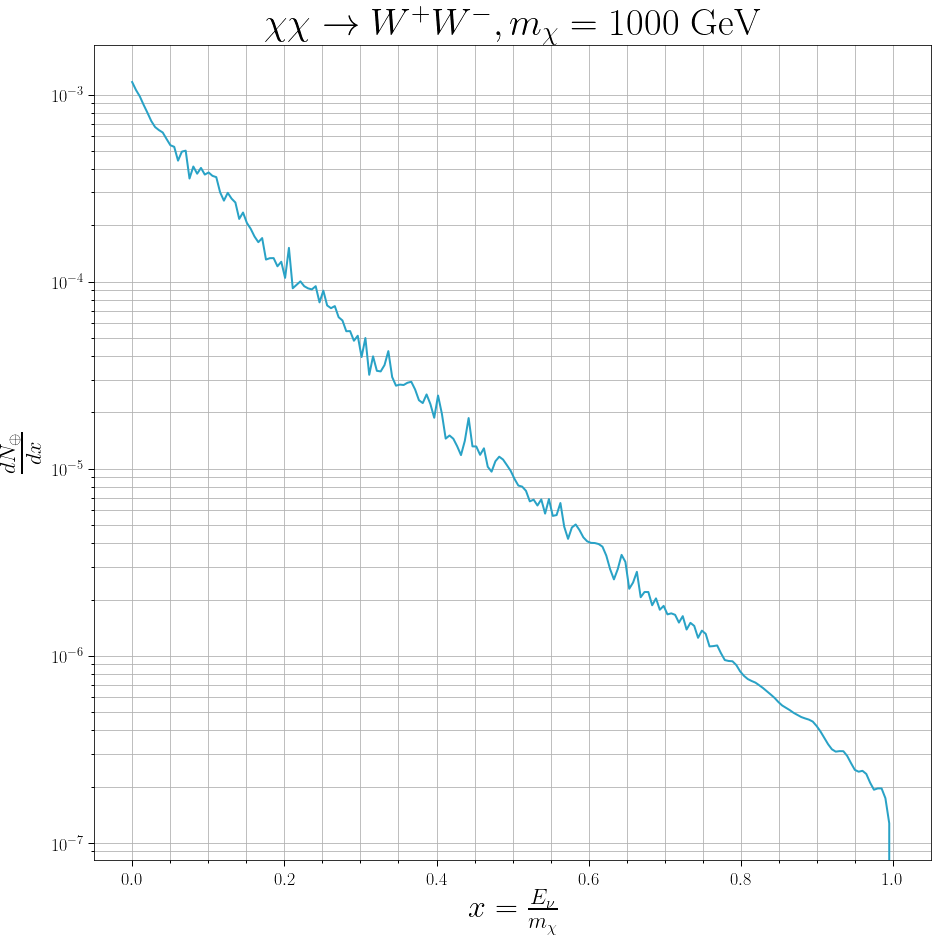

In [22]:
plt.plot(np.linspace(0,1,200), np.load("/Users/jlazar/Documents/IceCube/data/ch8_m1000_flux.npy")[0][0])
plt.semilogy()
plt.xlabel(r"$x=\frac{E_{\nu}}{m_{\chi}}$")
plt.ylabel(r"$\frac{dN_{\oplus}}{dx}$")
plt.grid(which="both")
plt.title(r"$\chi\chi\rightarrow W^{+}W^{-}, m_{\chi}=1000$ GeV")
plt.show()

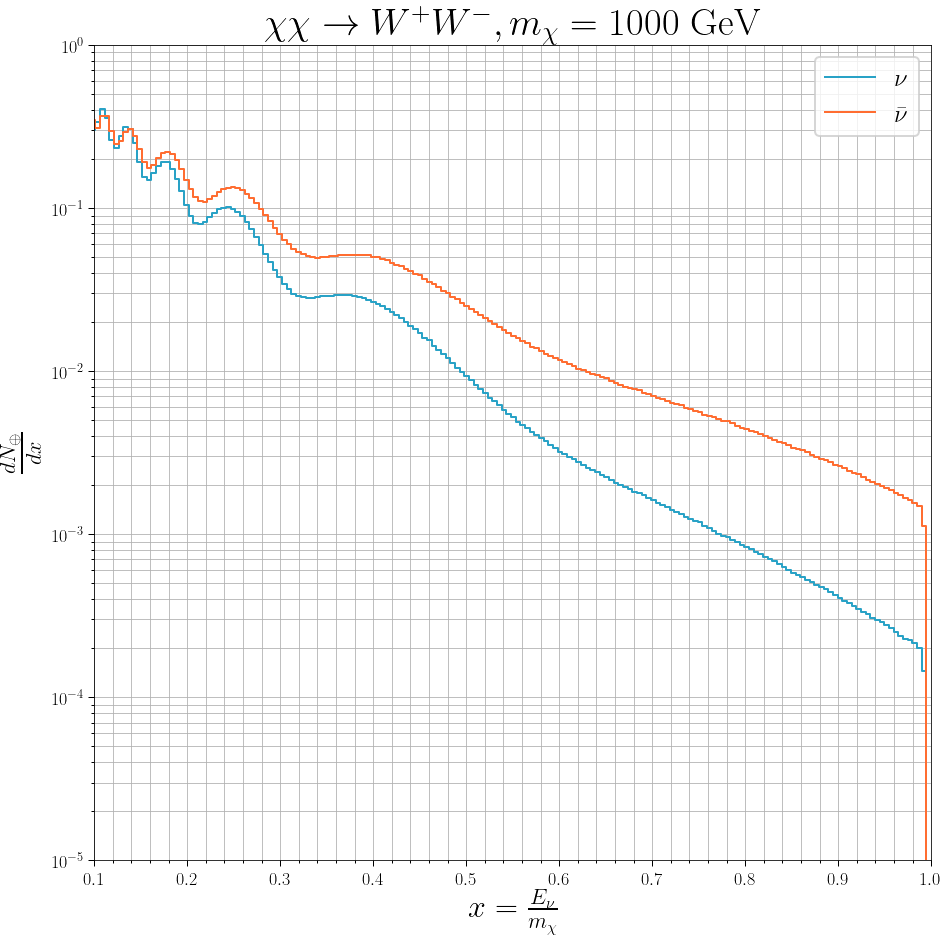

In [37]:
f = np.load("ch8_m1000_test.npy")*1000
plt.step(np.linspace(0.001,1,200), f[0],label=r"$\nu$")
plt.step(np.linspace(0.001,1,200), f[1],label=r"$\bar{\nu}$")
plt.semilogy()
plt.xlabel(r"$x=\frac{E_{\nu}}{m_{\chi}}$")
plt.ylabel(r"$\frac{dN_{\oplus}}{dx}$")
plt.grid(which="both")
plt.legend()
plt.ylim(1e-5,1)
plt.xlim(0.1,1)
plt.title(r"$\chi\chi\rightarrow W^{+}W^{-}, m_{\chi}=1000$ GeV")
plt.show()

/Users/jlazar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


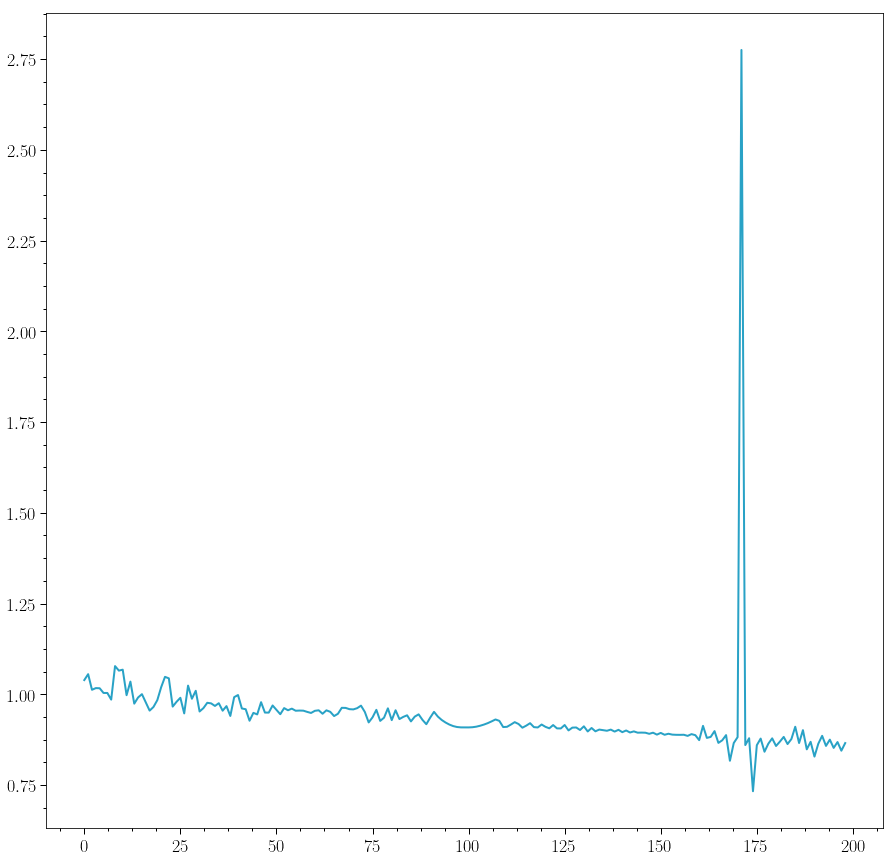

In [74]:
plt.plot(np.load("/Users/jlazar/Documents/IceCube/data/ch11_m3000_flux.npy")[0][-1]/np.load("/Users/jlazar/Documents/IceCube/data/ch11_m3000_flux.npy")[0][0])
plt.show()

In [50]:
min(np.load("data/mcRecarray.npy")["recoE"])

4.5242002408284

In [22]:
def interp_dn_dz(ch, m):
    
    ws_ch = ws_chan_dict[ch]
    
    # Load data files
#     dN_dz  = np.load("/Users/jlazar/Documents/IceCube/solar_WIMP/data/qr_dn_dz/ch%d_m%d_dn_dz_new.npy" % (ws_ch, m))
    dN_dz  = np.load("data/qr_dn_dz/ch%d_m%d_dn_dz.npy" % (ws_ch, m))
    mc     = np.load("data/mcRecarray.npy")
    
    # Get all quantities from dN_dE file arranged
    nu_flux     = dN_dz[0]
    nu_bar_flux = dN_dz[1]
    n_zen       = nu_flux.shape[0]
    n_en        = nu_flux.shape[1]
    es          = np.tile(np.linspace(e_min, m, n_en), n_zen)
    zs          = np.concatenate([np.full(n_en, zen) for zen in zens])
    
    # Get all mc quantities ready
    nu_i           = np.where(mc["i"]==14)[0]
    nu_bar_i       = np.where(mc["i"]==-14)[0]
    nu_e           = mc["nuE"][nu_i]
    nu_bar_e       = mc["nuE"][nu_bar_i]
    nu_zen         = np.degrees(mc["nuZen"][nu_i])
    nu_bar_zen     = np.degrees(mc["nuZen"][nu_bar_i])
    
    
    # Prepare points and values arrays
    points        = np.vstack([es,zs]).T
    nu_values     = np.log10(np.concatenate(nu_flux))
    nu_bar_values = np.log10(np.concatenate(nu_bar_flux))

    # Replace -infinities from log(0) with large neg values
    nu_values[np.where(np.isinf(nu_values))]         = -500
    nu_bar_values[np.where(np.isinf(nu_bar_values))] = -500
    
    # Interpolate
    nu_gd          = griddata(points, nu_values,     (nu_e, nu_zen),         method="linear")
    nu_bar_gd      = griddata(points, nu_bar_values, (nu_bar_e, nu_bar_zen), method="linear")
    nu_interp      = np.power(10, nu_gd)
    nu_bar_interp  = np.power(10, nu_bar_gd)
        
    nu_interp[np.where(nu_e>m)[0]]         = 0
    nu_bar_interp[np.where(nu_bar_e>m)[0]] = 0
    
    # Save interpolated fluxes
    mc_flux           = np.zeros(len(mc["i"]))
    mc_flux[nu_i]     = nu_interp
    mc_flux[nu_bar_i] = nu_bar_interp
    mc_flux[np.where(np.isnan(mc_flux))] = 0
    np.save("data/mc_dn_dz/ch%d_m%d_mc_dn_dz.npy" % (ws_ch, m), mc_flux)
    return mc_flux

In [29]:


arr = interp_dn_dz("tautau", 2500)

IOError: [Errno 2] No such file or directory: 'data/qr_dn_dz/ch11_m2500_dn_dz.npy'

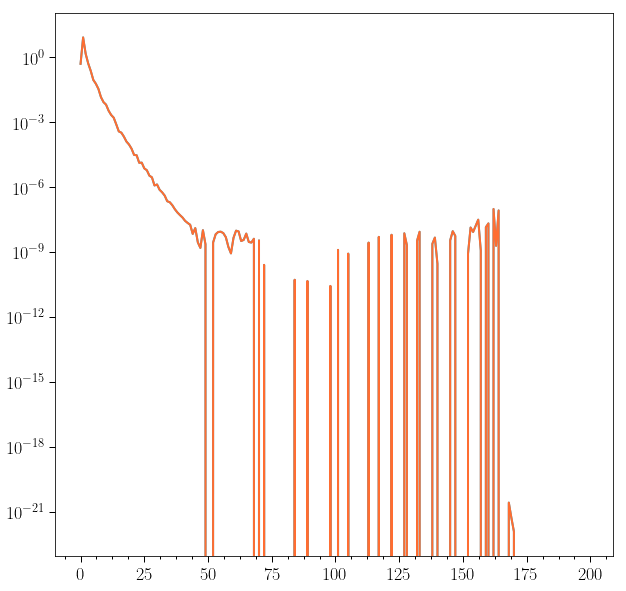

In [13]:
plt.plot(np.load("/Users/jlazar/Downloads/ch5_m10000_dn_dz.npy")[0][0])
plt.plot(np.load("/Users/jlazar/Downloads/ch5_m10000_dn_dz_new.npy")[0][0])
plt.semilogy()
plt.show()

In [ ]:
np.load("")

In [24]:
np.load("/Users/jlazar/Documents/IceCube/data/ch5_m1000_mc_dn_dz.npy")

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       8.01283147e-07, 0.00000000e+00, 4.38054799e-03])

In [39]:
np.load("/Users/jlazar/Documents/IceCube/data_old/ch8_m1000_mc_dn_dz.npy")

array([0.        , 0.        , 0.        , ..., 0.00514602, 0.        ,
       0.04273436])

In [48]:
r = np.load("/Users/jlazar/Documents/IceCube/data/mc_dn_dz/test/ch8_m1000_mc_dn_dz.npy") / np.load("/Users/jlazar/Documents/IceCube/data_old/ch8_m1000_mc_dn_dz.npy")
r_inv = np.power(-1, r)
r[np.where(r>0.01)]
print(r[np.where(~np.isnan(r))])
print(r[np.where(np.isinf(r))])

/Users/jlazar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/jlazar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/jlazar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  
/Users/jlazar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


[1.14471926 1.0578893  1.24143059 ... 0.9125556  1.0207092  1.03553814]
[inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf
 inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf]


In [23]:
np.load("/Users/jlazar/Downloads/ch5_m10000_dn_dz_new.npy")

array([[[0.49251033, 8.16577392, 1.43136443, ..., 0.        ,
         0.        , 0.        ],
        [0.4988965 , 8.17367662, 1.43089884, ..., 0.        ,
         0.        , 0.        ],
        [0.50501464, 8.18134603, 1.43044509, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.37835232, 7.58471463, 1.46310026, ..., 0.        ,
         0.        , 0.        ],
        [0.37828669, 7.58456133, 1.46311952, ..., 0.        ,
         0.        , 0.        ],
        [0.37826671, 7.58451072, 1.46312603, ..., 0.        ,
         0.        , 0.        ]],

       [[0.20516422, 8.88347493, 1.55348024, ..., 0.        ,
         0.        , 0.        ],
        [0.19811881, 8.89682566, 1.55306978, ..., 0.        ,
         0.        , 0.        ],
        [0.1915099 , 8.90978565, 1.55267494, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.27957757, 8.0330435 , 1.63120139, ..., 0.        ,
         0.        , 0.        ],
        [0.2